### Analyse de l'emploi dans le secteur de la Data 

###                   SITE MONSTER


In [1]:
#___________Librairies importées
import requests as rq
from bs4 import BeautifulSoup as bs
import json
import pandas as pd
import numpy as np
import re
import folium
import psycopg2
import pandas as pd
from psycopg2.extensions import parse_dsn
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import MarkerCluster

In [2]:
#___________Création DataFrame à partir du CSV
df = pd.read_csv('df1.csv')
#type(df)

ValueError: could not convert string to float: "'data-analyst'"

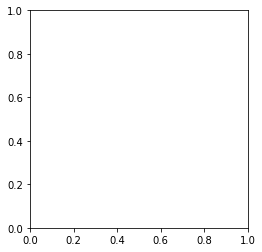

In [11]:
#df = pd.read_csv ('chart_work.csv')

data = df["mot_clef"]   
                    
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]    

plt.pie(data, labels=data , colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.show()

In [14]:
#___________Affichage du DataFrame
df

mot_clef                                     intitule_offre  \
0      'data-analyst'                         Data Financial Analyst H/F   
1      'data-analyst'        Business intelligence ou Data Analyst (H/F)   
2      'data-analyst'                  Stage - Data Analyst Junior - H/F   
3      'data-analyst'                                   Data Analyst F/H   
4      'data-analyst'                      Web Data Analyst confirmé H/F   
..                ...                                                ...   
310  'data-ingenieur'                            SRE Engineer /Ops (H/F)   
311  'data-ingenieur'  Stage - Ingenieur Travaux Infrastructures Liné...   
312  'data-ingenieur'                   Ingénieur Système & Réseau (H/F)   
313  'data-ingenieur'        Ingénieur Systèmes et Réseaux - ★★★★★ (H/F)   
314  'data-ingenieur'  Ingénieur Systèmes et Réseaux Lyon H/F - 139Vi...   

    nom_entreprise               lieu              DATE  \
0     Michael Page              Lyon   2021-02-11T12:00   
1       Innovallée            Meylan                NaN   
2         Photoweb      Saint-Egrève   2021-02-16T12:00   
3           AVANCI              Lyon   2021-02-11T12:00   
4           Wizbii          Grenoble   2021-01-15T12:00   
..             ...                ...               ...   
310       Coservit          Grenoble   2020-09-24T12:00   
311        Ingérop          Grenoble   2020-09-20T12:00   
312       Rezopole  Caluire-et-Cuire   2020-09-19T12:00   
313        Soluxan              Lyon   2021-01-11T12:00   
314       Visiativ              Lyon   2020-10-16T12:00   

                                                  lien   latitude  longitude  \
0    https://offre-demploi.monster.fr/data-financia...  45.767400   4.834300   
1    https://offre-demploi.monster.fr/business-inte...  45.209247   5.781198   
2    https://offre-demploi.monster.fr/stage-data-an...  45.217800   5.779600   
3    https://offre-demploi.monster.fr/data-analyst-...  45.271200   5.678200   
4    https://offre-demploi.monster.fr/web-data-anal...  45.767400   4.834300   
..                                                 ...        ...        ...   
310  https://offre-demploi.monster.fr/sre-engineer-...  45.507800   6.064700   
311  https://offre-demploi.monster.fr/stage-ingenie...  45.194200   5.731600   
312  https://offre-demploi.monster.fr/ingénieur-sys...  45.194200   5.731600   
313  https://offre-demploi.monster.fr/ingénieur-sys...  45.180800   5.697000   
314  https://offre-demploi.monster.fr/ingénieur-sys...  45.767400   4.834300   

                                           description Type-contrat langage1  \
0    DescriptionNotre client est un Groupe de capit...          NaN      NaN   
1    DescriptionTalents\n \n Business intelligence ...        stage      NaN   
2    DescriptionEn tant que Data Analyst Junior, no...        stage      SQL   
3    DescriptionData Analyst F/H\n \n >  > DATA ANA...          CDI      SQL   
4    DescriptionBienvenue dans notre magnifique ave...          CDI      SQL   
..                                                 ...          ...      ...   
310  DescriptionSRE Engineer /Ops\n \n PUBLISHED ON...          CDI      sql   
311  DescriptionOuvrir le sous-menu\n \n Fermer le ...          CDI      NaN   
312  DescriptionIngénieur Système & Réseau (H/F) \n...          NaN      NaN   
313  DescriptionPoste disponible en CDI ou Freelanc...          CDI      SQL   
314  DescriptionIngénieur Systèmes et Réseaux Lyon ...          CDI      SQL   

    langage2  
0        NaN  
1        NaN  
2        NaN  
3     Python  
4        NaN  
..       ...  
310   Python  
311      NaN  
312      NaN  
313      NaN  
314      NaN  

[315 rows x 12 columns]

### Répartition des offres par villes / Communes région Auvergne-Rhônes-Alpes   (MarkerCluster)

In [15]:
# ___________Cartographie

LAT_GRE = 45.188529
LONG_GRE = 5.724524
maps = folium.Map(location=[LAT_GRE, LONG_GRE],zoom_start=12)
marker_cluster= MarkerCluster()
for row in df.itertuples():
   # try :   
        folium.Marker(location=[row.latitude, row.longitude], popup=row.intitule_offre).add_to(marker_cluster)
   # except :
        marker_cluster.add_to(maps)
       # print(row)
# Afficher un périmètre de rayon 15km autour du centre de la carte
folium.Circle(
    radius= 15000,
    location= [LAT_GRE, LONG_GRE],
    color= "crimson",
    fill=False,
).add_to(maps)

maps 

### Pie chart Répartition des métiers de la data site Monster

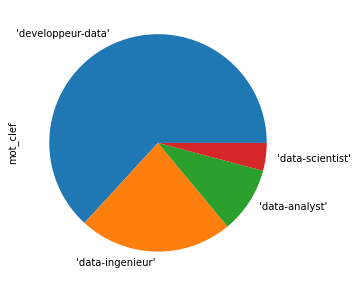

In [40]:
#_____________Répartition des métiers de la data sur le site Monster
plt.figure(figsize=(8, 5))
df["mot_clef"].value_counts().plot(kind='pie')
#ax.set_title('Répartition des métiers de la data sur le site Monster', fontsize=15)
plt.show()

In [12]:
df.columns

Index(['mot_clef', 'intitule_offre', 'nom_entreprise', 'lieu', 'DATE', 'lien',
       'latitude', 'longitude', 'description', 'Type-contrat', 'langage1',
       'langage2'],
      dtype='object')

In [17]:
for idx,column in enumerate(df.columns):
    print(idx,column)

0 mot_clef
1 intitule_offre
2 nom_entreprise
3 lieu
4 DATE
5 lien
6 latitude
7 longitude
8 description
9 Type-contrat
10 langage1
11 langage2


In [13]:
df.shape

(315, 12)

In [18]:
df['mot_clef']

0        'data-analyst'
1        'data-analyst'
2        'data-analyst'
3        'data-analyst'
4        'data-analyst'
             ...       
310    'data-ingenieur'
311    'data-ingenieur'
312    'data-ingenieur'
313    'data-ingenieur'
314    'data-ingenieur'
Name: mot_clef, Length: 315, dtype: object

In [25]:
labels = df['mot_clef'].value_counts()
print(labels)

'developpeur-data'    199
'data-ingenieur'       72
'data-analyst'         31
'data-scientist'       13
Name: mot_clef, dtype: int64


In [28]:
labels = df['mot_clef'].groupby()
print(labels)

<bound method Series.groupby of 0        'data-analyst'
1        'data-analyst'
2        'data-analyst'
3        'data-analyst'
4        'data-analyst'
             ...       
310    'data-ingenieur'
311    'data-ingenieur'
312    'data-ingenieur'
313    'data-ingenieur'
314    'data-ingenieur'
Name: mot_clef, Length: 315, dtype: object>


In [59]:
label = df['mot_clef'].unique()
print(label)

["'data-analyst'" "'data-scientist'" "'developpeur-data'"
 "'data-ingenieur'"]


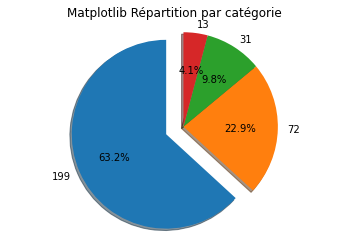

In [95]:
# utilisation Matplotlib
df = pd.read_csv('df1.csv')
label = df['mot_clef'].unique()
#plt.figure(figsize=(10,8))
explode = (0.2, 0, 0, 0)

#groupby the data by delivery type
datasum = df["mot_clef"].value_counts() #Equivalent d'un count + groupby.
fig1, ax1 = plt.subplots()
ax1.pie(datasum, explode=explode, labels=datasum, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Matplotlib Répartition par catégorie")

plt.show()

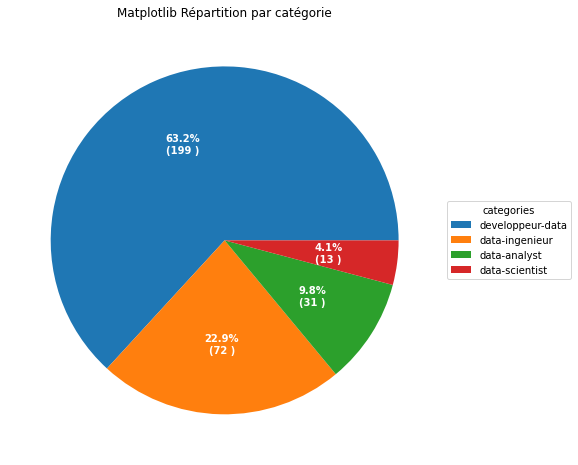

In [85]:

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))

recipe = [" 199 developpeur-data",
          " 72 data-ingenieur",
          " 31 data-analyst",
          " 13 data-scientist"]
#labels = df['mot_clef'].value_counts()

data = [float(x.split()[0]) for x in recipe]
categories = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} )".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, categories,
          title="categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Matplotlib Répartition par catégorie")

plt.show()